In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [8]:
### Read the dataset
os.chdir("D:/DOT/DA_Project")
df = pd.read_csv("Diwali Sales Data.csv")

In [9]:
df.shape

(11251, 15)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra?radesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
# remove blank column
df.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [13]:
# Check null values
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.shape

(11251, 13)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(11239, 13)

In [17]:
# Chane datatype of Amount
df['Amount'] = df["Amount"].astype('int')

In [18]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


### Exploratory Data Analysis

### Gender

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

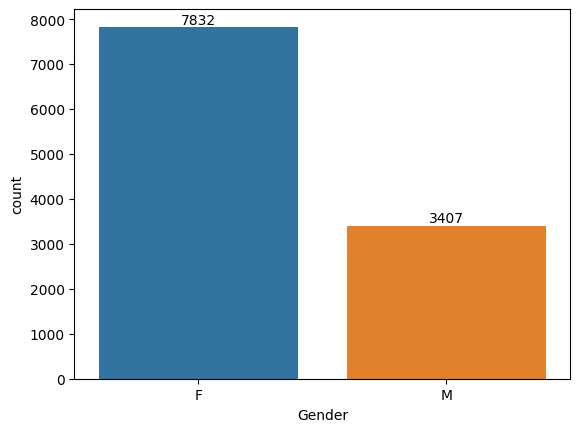

In [22]:
ax = sns.countplot(x = "Gender", data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

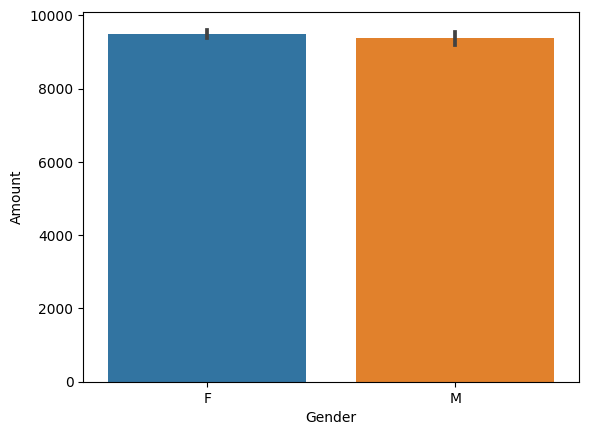

In [24]:
df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x = "Gender", y="Amount", data=df)

<Axes: xlabel='Gender', ylabel='Amount'>

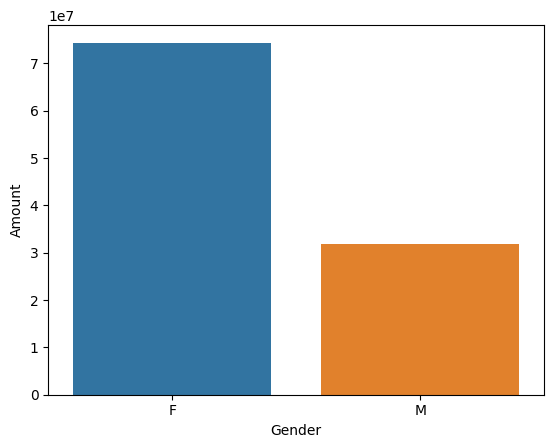

In [26]:
sales_gen = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x = "Gender", y="Amount", data=sales_gen)

from above graph we can see that most of the buyers even purchasing power also greater than man

### Age Group

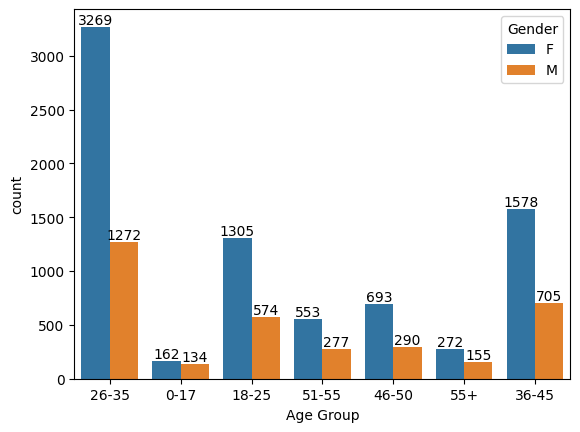

In [27]:
ax = sns.countplot(data=df, x='Age Group', hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

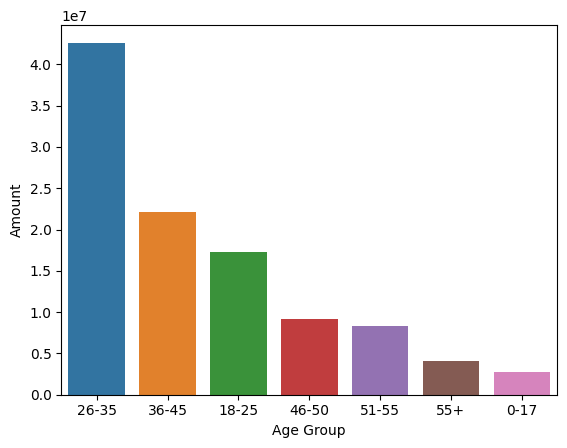

In [28]:
# Total Amount vs Age Group
sales_AG = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x = "Age Group", y="Amount", data=sales_AG)

from above graph we can see that most of the buyers are age group in between 26-35 yrs female

### State

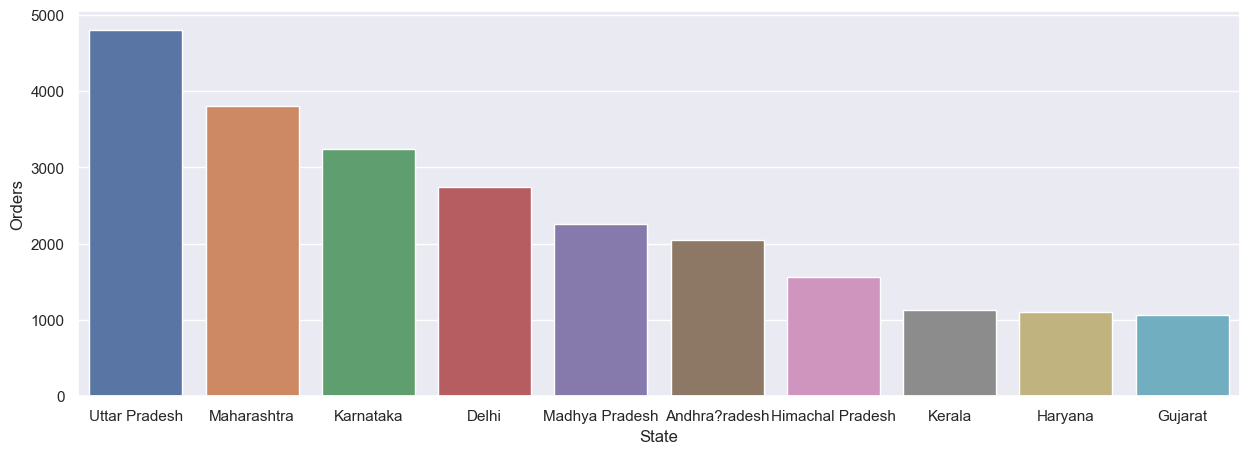

In [29]:
sales_state = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State", y="Orders", data=sales_state)
plt.show()

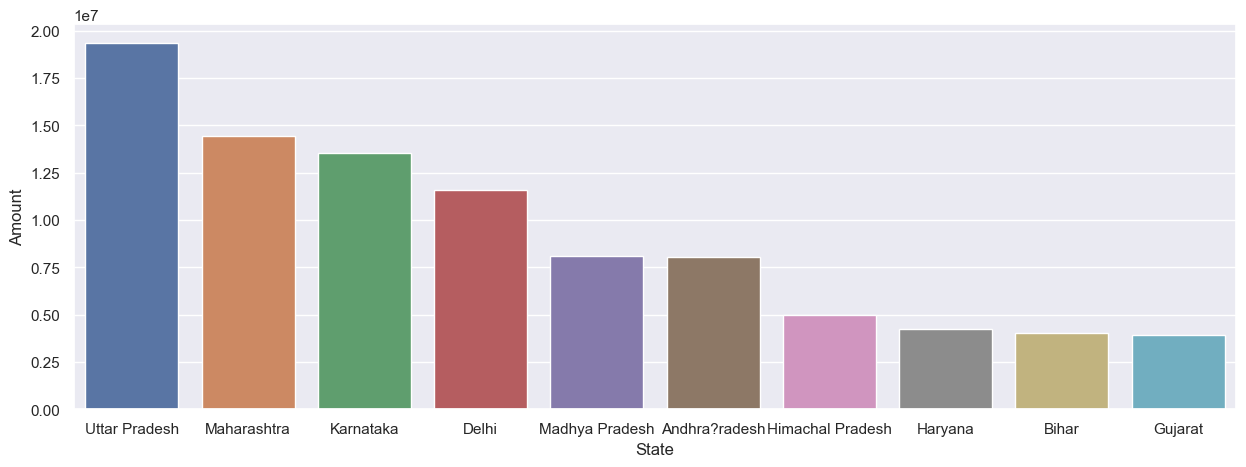

In [30]:
# Total amount/sales from top 5 states
sales_state = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State", y="Amount", data=sales_state)
plt.show()

from above graph we can see that the most of the orders are from UP, Maharashtra, Karnataka

### Marital Status

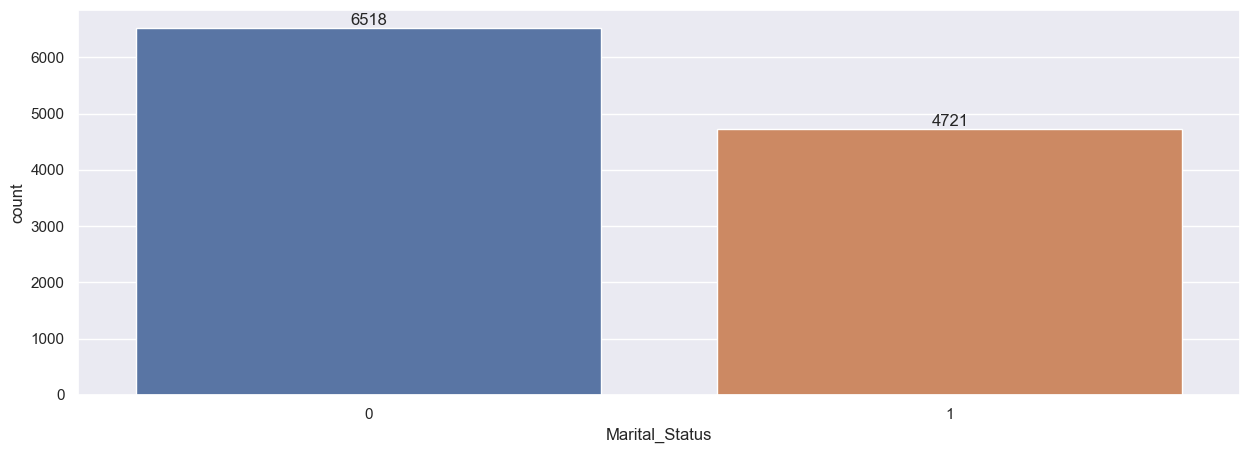

In [31]:
ax = sns.countplot(data=df, x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

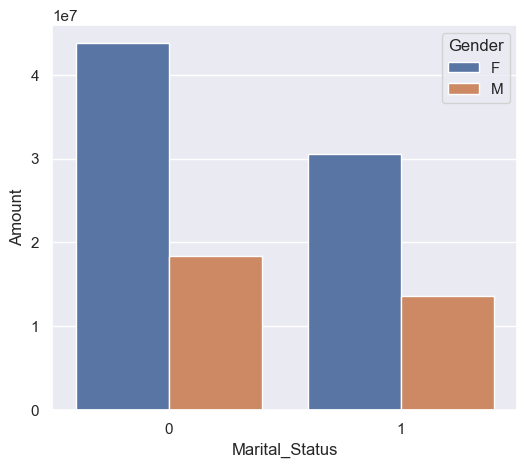

In [32]:
sales_state = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x = "Marital_Status", y="Amount", hue="Gender", data=sales_state)

from the above graph we can say that most of the buyeras are married women and they have high purchasing power

### Occupation

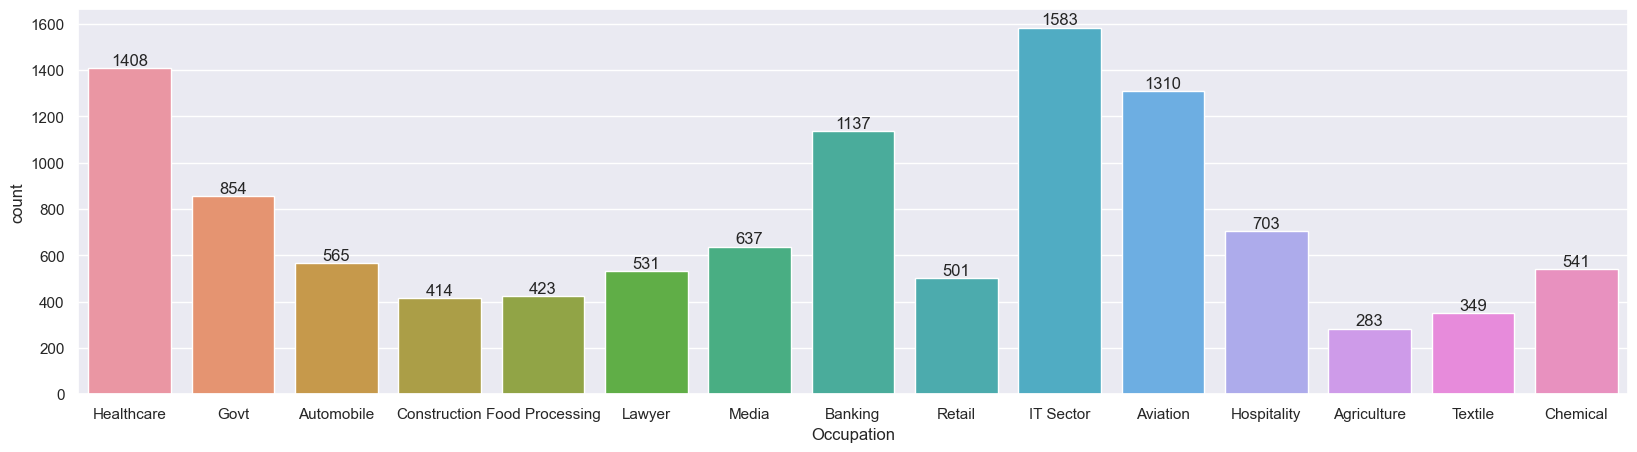

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

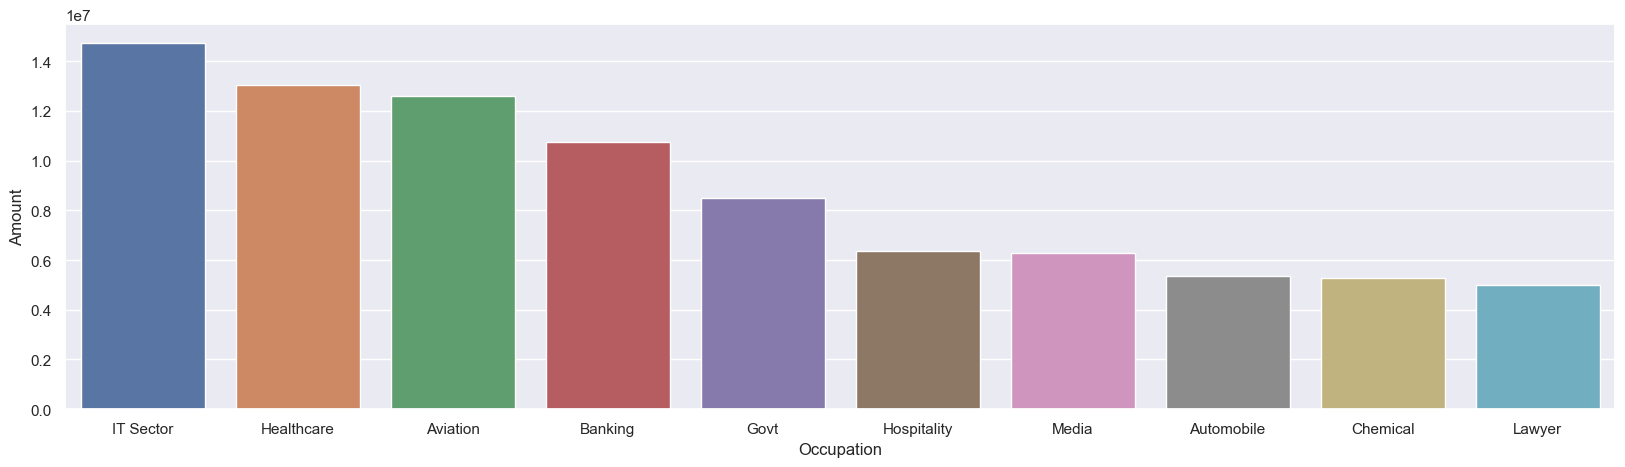

In [36]:
sales_state = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = "Occupation", y="Amount", data=sales_state)

From above graphs we can see the most of the buyers are working in IT Sector, Healthcare and Aviation center

### Product Category

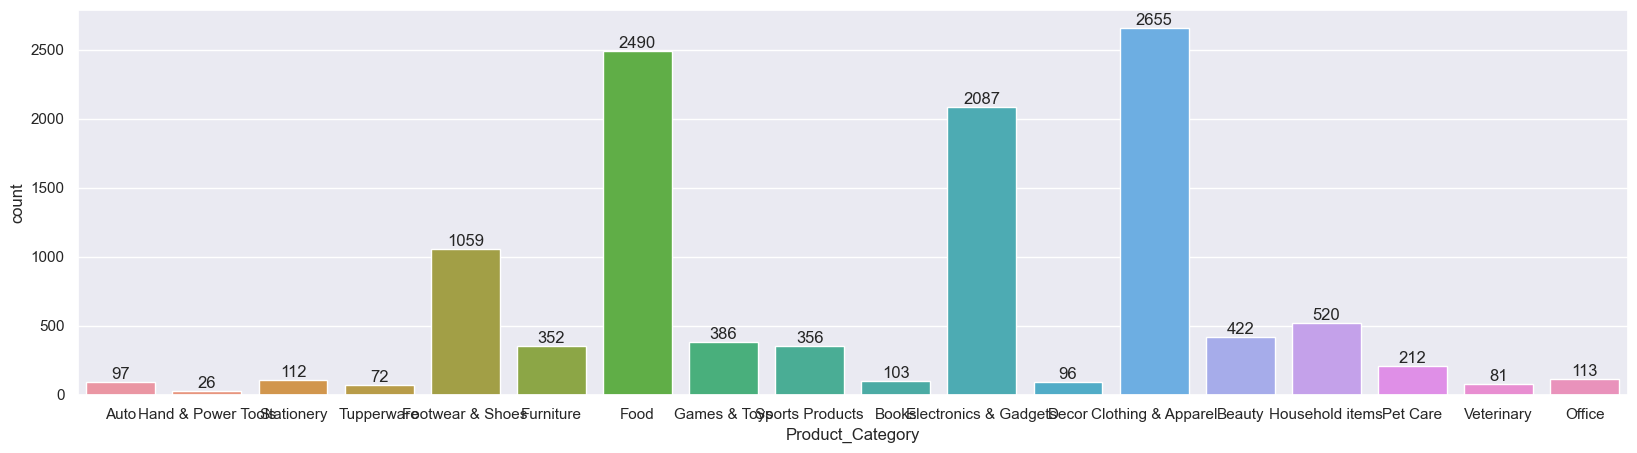

In [37]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

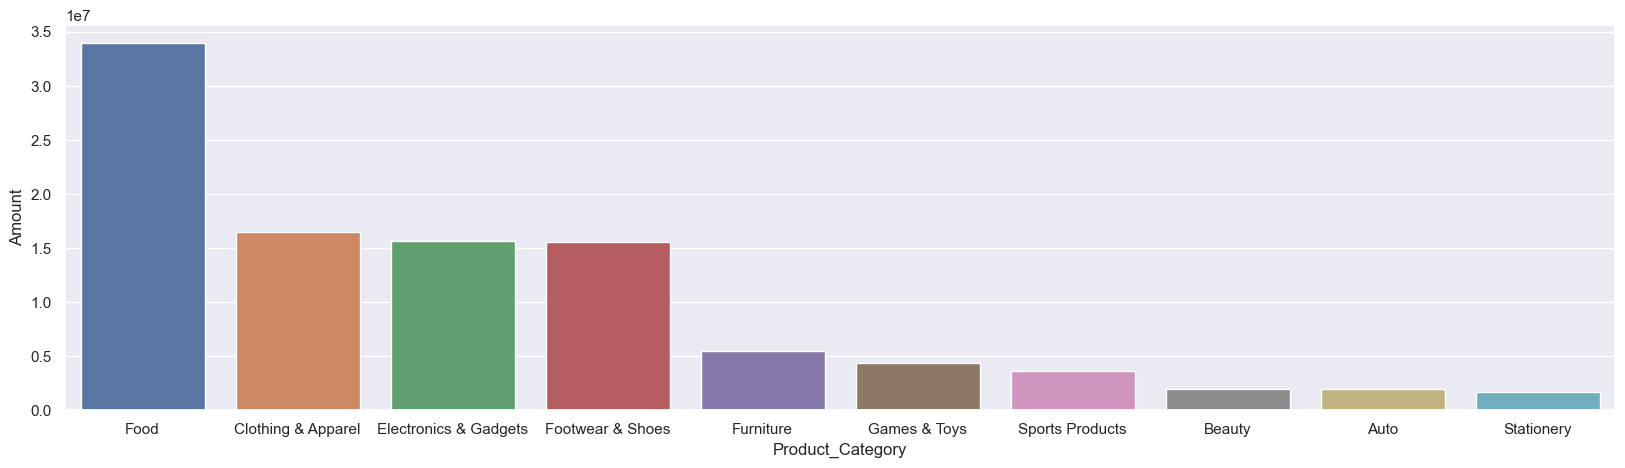

In [38]:
sales_state = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = "Product_Category", y="Amount", data=sales_state)

From above graphs we can see that most of the products are rom Food, Clothing and electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

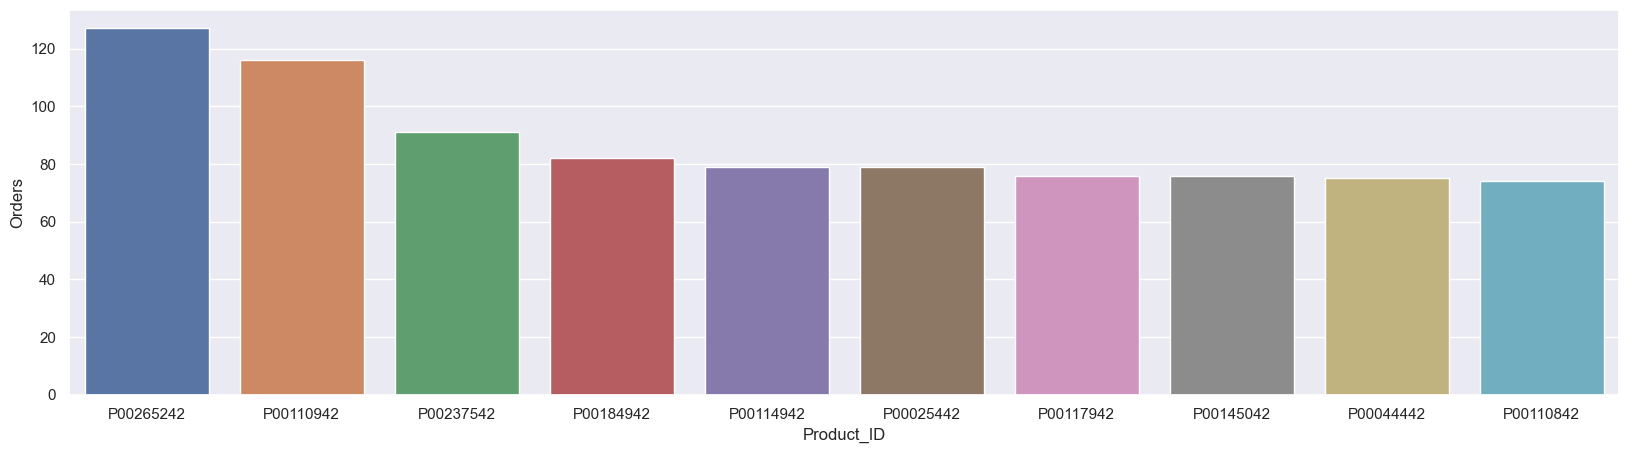

In [39]:
sales_state = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = "Product_ID", y="Orders", data=sales_state)

### Conclusion

#### Married women age group 26-35 yrs from UP, Maharashta and Karnataka working in IT, Healthcare and Aviation are more like and buy products from Food , Cloathing and Electronic Category